In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data

,distance_km,traffic_level,rain_mm,departure_min,vehicle_type,travel_time_min
0,8.12,4,0.0,161,1,34.9
1,7.97,2,0.0,116,1,27.8
2,8.16,2,0.9,59,0,25.7
3,8.38,2,4.5,40,0,38.2
4,7.94,6,0.0,99,0,41.2
...,...,...,...,...,...,...
9995,8.33,7,0.0,35,1,35.2
9996,7.50,8,0.0,126,1,48.0
9997,7.82,3,0.0,154,0,36.9
9998,8.12,7,0.0,156,1,41.1


In [4]:
import seaborn as sns

<Axes: xlabel='distance_km', ylabel='travel_time_min'>

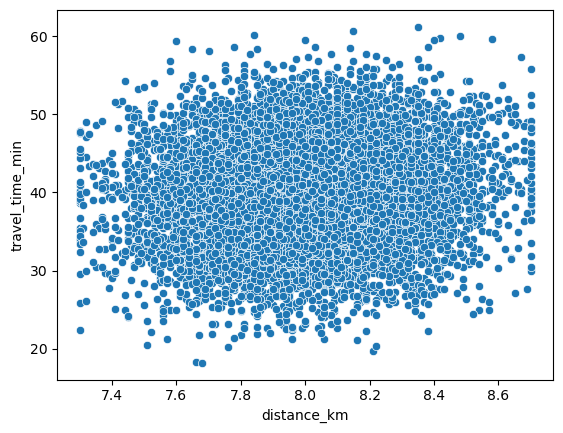

In [5]:
sns.scatterplot(x=data['distance_km'],y=data['travel_time_min'])

<Axes: xlabel='distance_km', ylabel='travel_time_min'>

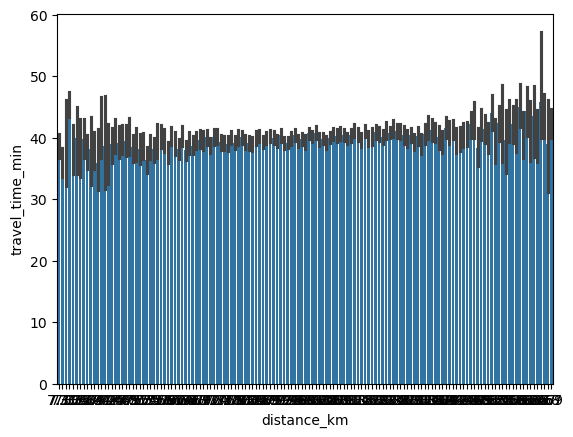

In [6]:
sns.barplot(x=data['distance_km'],y=data['travel_time_min'])

<Axes: xlabel='rain_mm', ylabel='travel_time_min'>

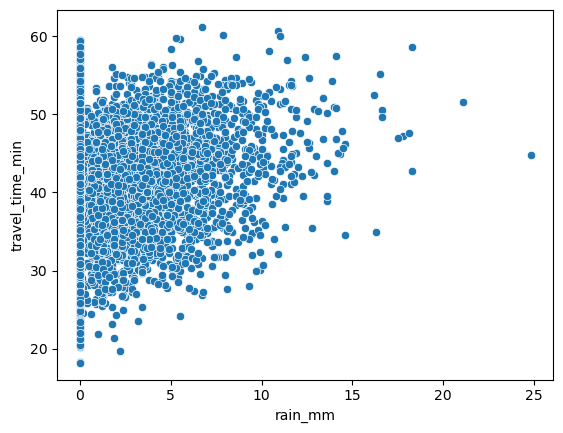

In [7]:
sns.scatterplot(x=data['rain_mm'],y=data['travel_time_min'])

<Axes: xlabel='traffic_level', ylabel='travel_time_min'>

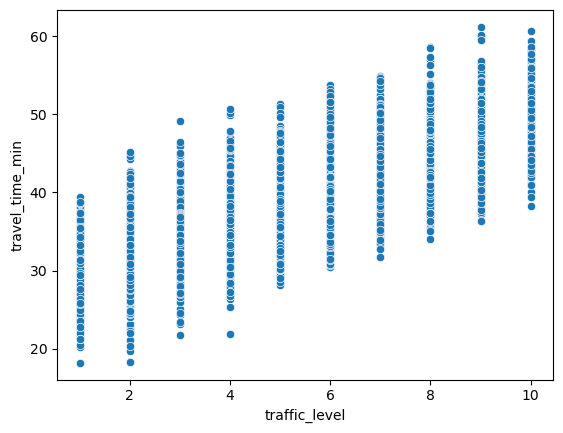

In [8]:
sns.scatterplot(x=data['traffic_level'],y=data['travel_time_min'])

<Axes: xlabel='departure_min', ylabel='travel_time_min'>

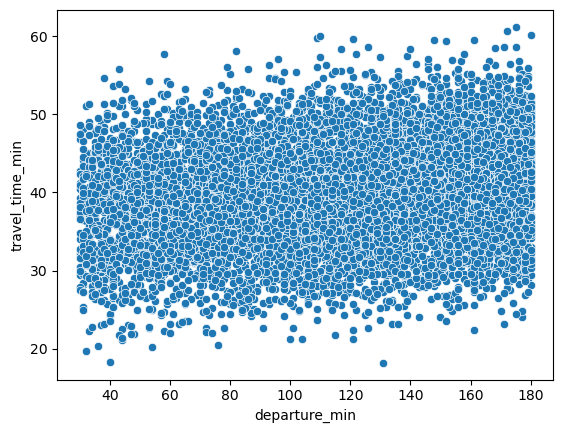

In [9]:
sns.scatterplot(x=data['departure_min'],y=data['travel_time_min'])

<Axes: xlabel='vehicle_type', ylabel='travel_time_min'>

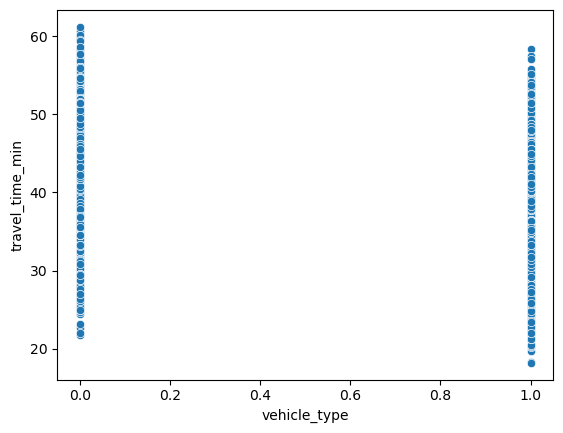

In [10]:
sns.scatterplot(x=data['vehicle_type'],y=data['travel_time_min'])

In [11]:
x=data['travel_time_min']
y=data.drop("travel_time_min",axis=1)

In [12]:
x


0       34.9
1       27.8
2       25.7
3       38.2
4       41.2
        ... 
9995    35.2
9996    48.0
9997    36.9
9998    41.1
9999    45.6
Name: travel_time_min, Length: 10000, dtype: float64

In [13]:
x_tr,x_t,y_tr,y_t=train_test_split(y,x)

In [14]:
y_t

2690    34.6
2970    43.2
7236    31.8
3558    36.1
2022    50.2
        ... 
1924    50.1
6809    30.6
6820    40.4
6510    46.7
995     38.3
Name: travel_time_min, Length: 2500, dtype: float64

In [15]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV as gscv

In [16]:
model1=Ridge()


In [17]:
params={"alpha":[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1,5,10,20,30,45,50]}
best_ridge=gscv(model1,params)

In [18]:
best_ridge.fit(x_tr,y_tr)

,estimator,Ridge()
,param_grid,"{'alpha': [0.01, 0.05, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [19]:
best_ridge.best_params_

{'alpha': 1}

In [20]:
predict1=best_ridge.predict(x_t)

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(predict1,y_t)

0.7169258572593415

In [23]:
predict1

array([35.06403294, 41.53697945, 31.8653748 , ..., 41.42700948,
       46.13760289, 41.2945942 ], shape=(2500,))

In [24]:
y_t

2690    34.6
2970    43.2
7236    31.8
3558    36.1
2022    50.2
        ... 
1924    50.1
6809    30.6
6820    40.4
6510    46.7
995     38.3
Name: travel_time_min, Length: 2500, dtype: float64

In [25]:
model2=Lasso()

In [26]:
params={"alpha":[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1,5,10,20,30,45,50]}
best_lasso=gscv(model2,params)
best_lasso.fit(x_tr,y_tr)

,estimator,Lasso()
,param_grid,"{'alpha': [0.01, 0.05, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [27]:
best_lasso.best_params_

{'alpha': 0.01}

In [28]:
pred2=best_lasso.predict(x_t)

In [29]:
r2_score(pred2,y_t)

0.7153548630180884

In [30]:
pred2

array([35.12770967, 41.63066314, 31.89795941, ..., 41.37001821,
       46.05702774, 41.32385372], shape=(2500,))

In [31]:
y_t

2690    34.6
2970    43.2
7236    31.8
3558    36.1
2022    50.2
        ... 
1924    50.1
6809    30.6
6820    40.4
6510    46.7
995     38.3
Name: travel_time_min, Length: 2500, dtype: float64

In [32]:
model3=ElasticNet()

In [33]:
params={"alpha":[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1,5,10,20,30,45,50],"l1_ratio":[0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.7,0.8,0.85,0.9]}
best_elastic=gscv(model3,params)

In [34]:
best_elastic.fit(x_tr,y_tr)

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.01, 0.05, ...], 'l1_ratio': [0.1, 0.2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [35]:
pred3=best_elastic.predict(x_t)

In [36]:
r2_score(pred3,y_t)

0.7151265091589583

In [37]:
pred3

array([35.13699193, 41.6440056 , 31.90425271, ..., 41.36354878,
       46.04507014, 41.3290178 ], shape=(2500,))

In [38]:
y_t

2690    34.6
2970    43.2
7236    31.8
3558    36.1
2022    50.2
        ... 
1924    50.1
6809    30.6
6820    40.4
6510    46.7
995     38.3
Name: travel_time_min, Length: 2500, dtype: float64

In [39]:
from sklearn.tree import DecisionTreeRegressor as dt

In [40]:
model4=dt()

In [41]:
model4.fit(x_tr,y_tr)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [42]:
pred4=model4.predict(x_t)

In [43]:
r2_score(pred4,y_t)

0.5411467517172621

In [44]:
from sklearn.linear_model import LinearRegression as ls

In [45]:
model5=ls()
model5.fit(x_tr,y_tr)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
pred5=model5.predict(x_t)

In [47]:
r2_score(pred5,y_t)

0.7169766002648048

In [48]:
from sklearn.metrics import root_mean_squared_error as rmse
pred_list=[predict1,pred2,pred3,pred5]
scores=[]
for i in pred_list:
    scores.append(rmse(i,y_t))

In [49]:
scores

[2.9880889736652954, 2.9887836174516402, 2.9889520313884024, 2.988074987289142]

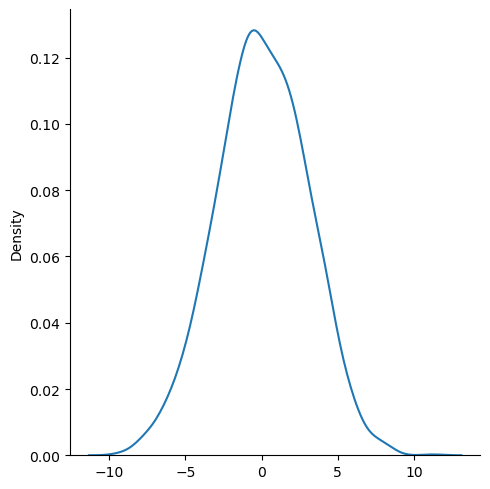

In [50]:
sns.displot(pred5-np.array(y_t),kind='kde')

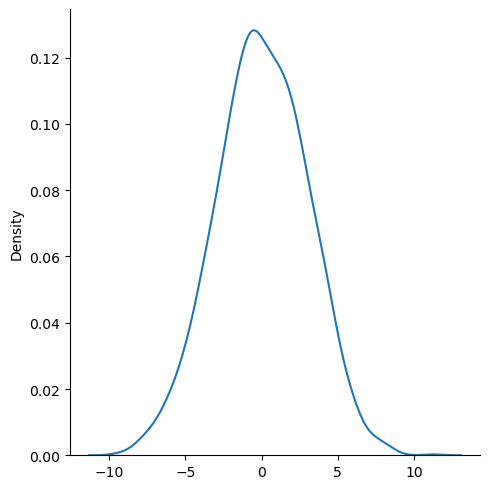

In [51]:
sns.displot(pred_list[0]-np.array(y_t),kind='kde')

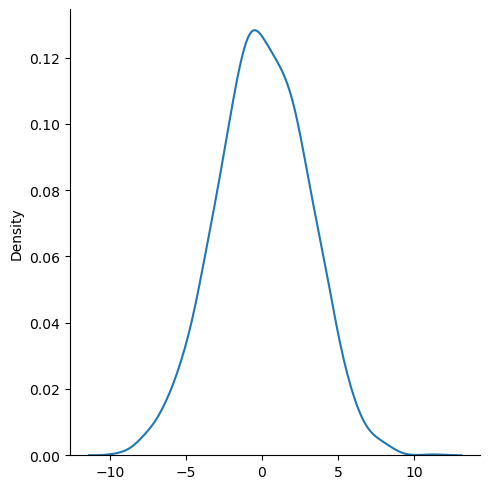

In [52]:
sns.displot(pred3-np.array(y_t),kind='kde')

In [53]:
model_list=[best_ridge,best_lasso,best_elastic,model5]
r2scor=[]
rmsescor=[]
for i in model_list:
    pred=i.predict(x_tr)
    r2scor.append(r2_score(pred,y_tr))
    rmsescor.append(rmse(pred,y_tr))
    

In [54]:
r2scor

[0.7241419463545438, 0.7227278813532105, 0.722524818394739, 0.7241870289225993]

In [55]:
rmsescor

[2.9756325992690904, 2.9759788476687827, 2.976081069377213, 2.9756322025268145]